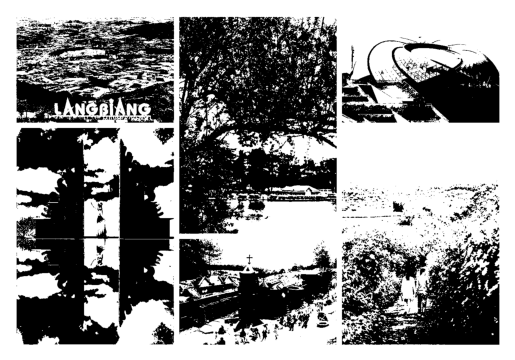

In [1]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu  # Đúng cú pháp

# Đọc ảnh và chuyển sang ảnh xám (grayscale)
data = Image.open('dalat.jpg').convert('L')

# Chuyển ảnh từ định dạng PIL sang mảng NumPy
a = np.asarray(data)

# Áp dụng ngưỡng hóa Otsu để tự động tìm ngưỡng tách sáng/tối
thres = threshold_otsu(a)

# Tạo ảnh nhị phân: giữ lại những pixel có giá trị > ngưỡng
b = a > thres

# Chuyển lại thành ảnh kiểu PIL để hiển thị bằng matplotlib
b = Image.fromarray(b.astype(np.uint8) * 255)  # Chuyển True/False → 0/255

# Hiển thị ảnh kết quả
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()


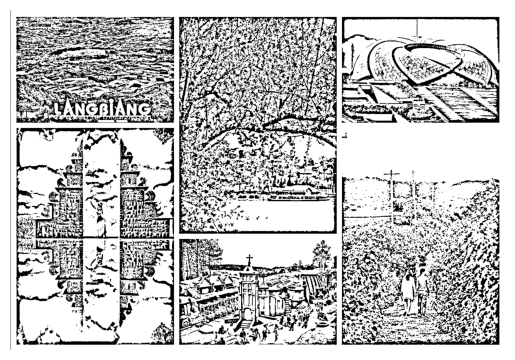

In [2]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local  # ✅ Sửa tên hàm cho đúng

# Đọc ảnh và chuyển sang ảnh xám (grayscale)
data = Image.open('dalat.jpg').convert('L')

# Chuyển ảnh sang mảng NumPy
a = np.asarray(data)

# Tính ngưỡng cục bộ: cửa sổ 39x39, trừ đi offset
b = threshold_local(a, block_size=39, offset=10)

# Áp dụng ngưỡng: tạo ảnh nhị phân
binary_image = a > b

# Chuyển về ảnh để hiển thị (0-255)
binary_image = Image.fromarray(binary_image.astype(np.uint8) * 255)

# Hiển thị ảnh
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()


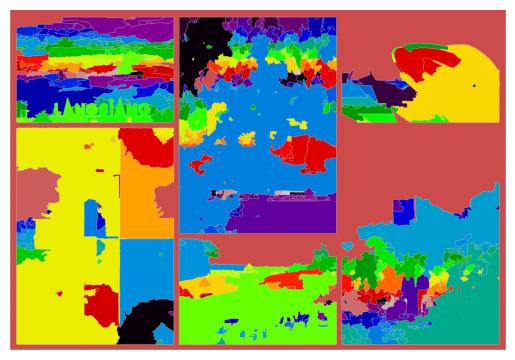

In [3]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Mở ảnh và chuyển nó sang ảnh xám
data = cv2.imread('dalat.jpg')

# Chuyển đổi ảnh từ màu sang xám
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# Ngưỡng hóa ảnh để lấy các pixel của vật thể (trái cây)
# Sử dụng phương pháp Otsu và đảo màu (đen thành trắng, trắng thành đen)
thresh, bl = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Do phương pháp Otsu phân đoạn quá nhiều (over-segmentation)
# nên thực hiện phép co ảnh (erosion) để loại bỏ nhiễu nhỏ
b2 = cv2.erode(bl, None, iterations=2)

# Thực hiện phép biến đổi khoảng cách (distance transform)
dist_trans = cv2.distanceTransform(b2, distanceType=cv2.DIST_L2, maskSize=3)

# Ngưỡng hóa ảnh khoảng cách để xác định các vùng tiền cảnh (foreground)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

# Gán nhãn cho các vùng được tách (labeling)
labelled, ncc = label(dt)

# Chuyển mảng labelled sang kiểu số nguyên 32-bit để dùng với watershed
labelled = labelled.astype(np.int32)

# Thực hiện giải thuật tách vùng Watershed để phân vùng rõ ràng hơn
cv2.watershed(data, labelled)

# Chuyển mảng kết quả thành ảnh để hiển thị
# (labelled chứa nhãn các vùng khác nhau)
b = Image.fromarray(labelled.astype(np.uint8))  # cần ép về uint8 để hiển thị

# Hiển thị ảnh kết quả
plt.imshow(b, cmap='nipy_spectral')  # sử dụng colormap để dễ phân biệt vùng
plt.axis('off')
plt.show()


In [5]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as np
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s= [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b= nd.binary_closing (data, structure=s, iterations=50)
c= Image.fromarray (b)
c.show ()
plt.imshow(c)
plt.show ()

FileNotFoundError: [Errno 2] No such file or directory: 'dil_img.gif'

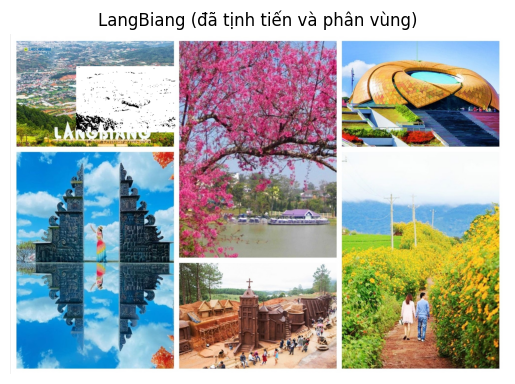

In [8]:
#baitap1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from PIL import Image

# 1. Đọc ảnh gốc từ thư mục exercise
image = cv2.imread('dalat.jpg')

# 2. Chuyển ảnh sang ảnh xám (grayscale)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Chọn vùng chứa LangBiang (giả sử biết tọa độ sẵn)
# Bạn có thể điều chỉnh các giá trị x, y, w, h theo đúng vùng LangBiang
x, y, w, h = 100, 100, 300, 200  # (x, y) là góc trái trên, w: rộng, h: cao
roi = gray[y:y+h, x:x+w]

# 4. Tịnh tiến vùng chọn sang phải 100px
new_x = x + 100
# Tạo bản sao ảnh gốc để vẽ lên
output = image.copy()
# Chuyển ROI sang màu để vẽ vào ảnh màu
roi_color = image[y:y+h, x:x+w].copy()
output[y:y+h, new_x:new_x+w] = roi_color  # Chép vùng ROI vào vị trí mới

# 5. Phân ngưỡng Otsu với ngưỡng giới hạn 0.3
# Chuẩn hóa ảnh ROI về [0,1]
roi_norm = roi / 255.0
otsu_thresh = threshold_otsu(roi_norm)
final_thresh = 0.3 if otsu_thresh > 0.3 else otsu_thresh  # Lấy ngưỡng tối thiểu là 0.3
binary_roi = roi_norm > final_thresh

# Chuyển ảnh nhị phân về kiểu 0-255 để hiển thị
binary_roi = (binary_roi * 255).astype(np.uint8)

# Thay thế vùng đã tịnh tiến bằng vùng nhị phân LangBiang
output[y:y+h, new_x:new_x+w] = cv2.cvtColor(binary_roi, cv2.COLOR_GRAY2BGR)

# 6. Lưu kết quả vào lang_biang.jpg
cv2.imwrite('lang_biang.jpg', output)

# 7. Hiển thị ảnh kết quả
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb)
plt.axis('off')
plt.title("LangBiang (đã tịnh tiến và phân vùng)")
plt.show()


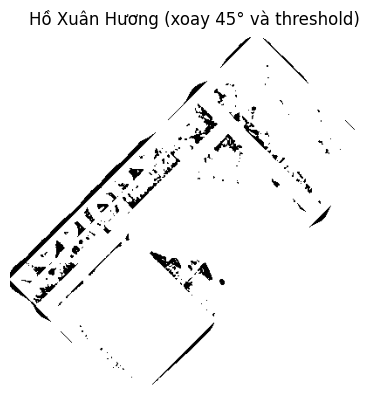

In [7]:
#baitap2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Đọc ảnh từ thư mục
image = cv2.imread('dalat.jpg')

# 2. Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Chọn vùng Hồ Xuân Hương (giả định tọa độ)
# Bạn cần điều chỉnh x, y, w, h cho đúng vị trí hồ nếu biết chính xác
x, y, w, h = 200, 300, 400, 200  # ví dụ: chọn vùng nằm giữa ảnh
roi = gray[y:y+h, x:x+w]

# 4. Xoay vùng ROI 45 độ
# Tính tâm vùng chọn
center = (w // 2, h // 2)
# Tạo ma trận xoay
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
# Tính kích thước mới sau xoay
cos = np.abs(rotation_matrix[0, 0])
sin = np.abs(rotation_matrix[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))

# Điều chỉnh ma trận xoay để không bị cắt ảnh
rotation_matrix[0, 2] += (new_w / 2) - center[0]
rotation_matrix[1, 2] += (new_h / 2) - center[1]

# Thực hiện xoay
rotated = cv2.warpAffine(roi, rotation_matrix, (new_w, new_h), flags=cv2.INTER_LINEAR)

# 5. Áp dụng Adaptive Thresholding với ngưỡng cục bộ và ngưỡng 60
# OpenCV cần ảnh 8-bit cho adaptiveThreshold
# blockSize: kích thước vùng, C=60 là giá trị trừ đi sau tính trung bình
adaptive = cv2.adaptiveThreshold(
    rotated,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=31,      # blockSize phải là số lẻ > 1
    C=60               # C là giá trị trừ sau khi lấy trung bình
)

# 6. Lưu kết quả vào file
cv2.imwrite('ho_xuan_huong.jpg', adaptive)

# 7. Hiển thị ảnh kết quả
plt.imshow(adaptive, cmap='gray')
plt.axis('off')
plt.title("Hồ Xuân Hương (xoay 45° và threshold)")
plt.show()


In [ ]:
#baitap3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import binary_closing
from skimage.transform import warp, AffineTransform

# 1. Đọc ảnh từ thư mục
image = cv2.imread('exercise/dalat.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Chọn vùng chứa Quảng trường Lâm Viên (giả định vùng đã biết)
# Bạn có thể thay đổi giá trị x, y, w, h theo đúng tọa độ thực tế
x, y, w, h = 250, 200, 300, 200
roi = gray[y:y+h, x:x+w]

# 3. Coordinate Mapping (biến đổi affine đơn giản – ví dụ nghiêng hình)
# Tạo một phép biến đổi affine nhẹ để minh họa
transform = AffineTransform(scale=(1.0, 1.0), rotation=np.deg2rad(10), translation=(0, 0))

# Áp dụng biến đổi lên vùng ROI
roi_warped = warp(roi, inverse_map=transform.inverse, output_shape=roi.shape)
roi_warped = (roi_warped * 255).astype(np.uint8)  # Chuyển lại về 8-bit

# 4. Áp dụng nhị phân (threshold) đơn giản trước khi đóng vùng
_, binary_roi = cv2.threshold(roi_warped, 120, 255, cv2.THRESH_BINARY)

# 5. Áp dụng Binary Closing để làm liền vùng đứt nét
closed = binary_closing(binary_roi, structure=np.ones((5, 5))).astype(np.uint8) * 255

# 6. Thay thế vùng đã xử lý vào ảnh gốc để tạo ảnh hoàn chỉnh
result = image.copy()
result[y:y+h, x:x+w] = cv2.cvtColor(closed, cv2.COLOR_GRAY2BGR)

# 7. Lưu kết quả
cv2.imwrite('quan_truong_lam_vien.jpg', result)

# 8. Hiển thị ảnh kết quả
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Quảng Trường Lâm Viên sau Coordinate Mapping + Binary Closing")
plt.show()
